# Laboratorio 5

## 1,2 Descargar el dataset y cargar con python

In [74]:
#libs
import pandas as pd

# Preprocesamiento de texto
import re
import nltk
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

import seaborn as sns

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\josue\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [75]:
data = pd.read_csv('train.csv', encoding='latin-1')

##  3, Limpieza de texto

In [76]:
def clean_text(text):
    # Verificar que el texto no sea nulo
    if pd.isna(text) or text is None or text == "":
        return ""
    
    # Convertir a string si no lo es
    text = str(text)
    
    # Convertir a minúsculas
    text = text.lower()
    
    # Quitar URLs (patrón más completo)
    text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text)
    text = re.sub(r'www\.(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text)
    
    # Quitar mentions (@usuario) y hashtags (#hashtag) - patrón mejorado
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    text = re.sub(r'#[A-Za-z0-9_]+', '', text)
    
    # Quitar emoticones y símbolos unicode
    text = re.sub(r'[\U00010000-\U0010ffff]', '', text)  # Emoticones
    text = re.sub(r'[\u2600-\u26FF\u2700-\u27BF]', '', text)  # Símbolos adicionales
    
    # Quitar caracteres especiales, números y puntuación - mantener solo letras y espacios
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    
    # Quitar espacios extra
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Verificar que no esté vacío después de la limpieza
    if not text:
        return ""
    
    # Tokenizar palabras
    tokens = text.split()
    
    # Quitar stopwords y palabras muy cortas (mínimo 3 caracteres)
    tokens = [word for word in tokens if word not in stop_words and len(word) >= 3]
    
    return ' '.join(tokens)

# Aplicar la función al DataFrame
data['clean_text'] = data['text'].apply(clean_text)

# Mostrar los primeros resultados para verificar
data[['text', 'clean_text']]

,text,clean_text
0,Our Deeds are the Reason of this #earthquake M...,deeds reason may allah forgive
1,Forest fire near La Ronge Sask. Canada,forest fire near ronge sask canada
2,All residents asked to 'shelter in place' are ...,residents asked shelter place notified officer...
3,"13,000 people receive #wildfires evacuation or...",people receive evacuation orders california
4,Just got sent this photo from Ruby #Alaska as ...,got sent photo ruby smoke pours school
...,...,...
7608,Two giant cranes holding a bridge collapse int...,two giant cranes holding bridge collapse nearb...
7609,@aria_ahrary @TheTawniest The out of control w...,control wild fires california even northern pa...
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,utc volcano hawaii
7611,Police investigating after an e-bike collided ...,police investigating bike collided car little ...


# 4, 5 Frecuencia de las palabras tanto de los tweets de desastres como de los que no, palabra/s que se repite más en cada una de las categoría, nube de palabras, histograma

Palabras más comunes en tweets de desastres:
[('fire', 180), ('amp', 135), ('via', 121), ('disaster', 113), ('suicide', 112), ('california', 111), ('police', 108), ('people', 104), ('killed', 94), ('like', 94)]

Palabras más comunes en tweets NO de desastres:
[('like', 254), ('amp', 209), ('new', 171), ('get', 163), ('one', 133), ('body', 115), ('would', 101), ('via', 99), ('people', 94), ('video', 94)]


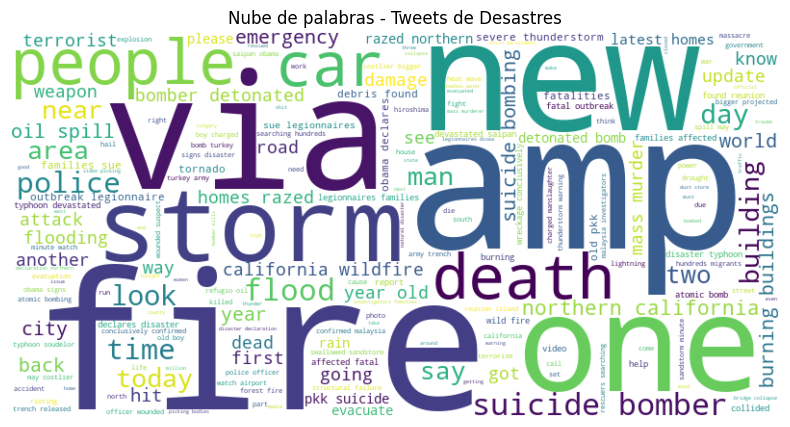

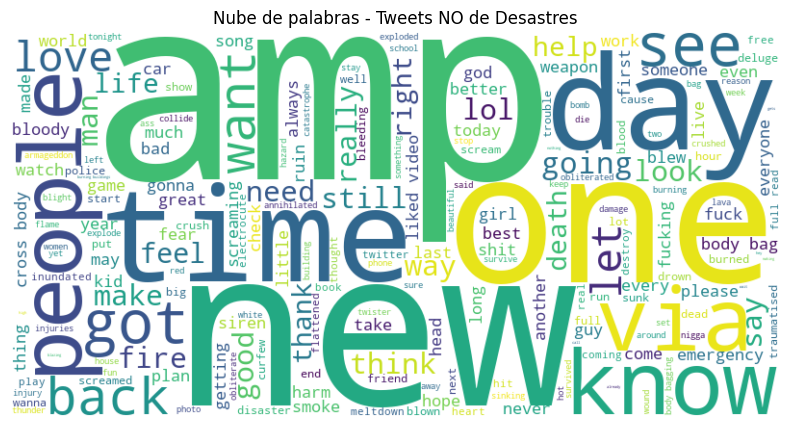

Bigramas/Trigramas más frecuentes en tweets de desastres:
['bomber detonated' 'burning buildings' 'california wildfire'
 'homes razed' 'northern california' 'northern california wildfire'
 'oil spill' 'suicide bomber' 'suicide bomber detonated' 'suicide bombing']
Las palabras y n-gramas más frecuentes pueden ayudar a identificar patrones y contexto relevante para la clasificación. Explorar bigramas y trigramas puede ser útil para capturar relaciones entre palabras y mejorar el modelo.


In [77]:
# Análisis exploratorio de frecuencia de palabras y visualización

# Separar tweets de desastres y no desastres
disaster_tweets = data[data['target'] == 1]['clean_text']
non_disaster_tweets = data[data['target'] == 0]['clean_text']

# Función para obtener frecuencias de palabras
def get_word_freq(texts):
    words = ' '.join(texts).split()
    return Counter(words)

# Frecuencias
freq_disaster = get_word_freq(disaster_tweets)
freq_non_disaster = get_word_freq(non_disaster_tweets)

# Palabras más comunes
most_common_disaster = freq_disaster.most_common(10)
most_common_non_disaster = freq_non_disaster.most_common(10)
print('Palabras más comunes en tweets de desastres:')
print(most_common_disaster)
print('\nPalabras más comunes en tweets NO de desastres:')
print(most_common_non_disaster)

# Nube de palabras para desastres
plt.figure(figsize=(10,5))
wc_disaster = WordCloud(width=800, height=400, background_color='white').generate(' '.join(disaster_tweets))
plt.imshow(wc_disaster, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras - Tweets de Desastres')
plt.show()

# Nube de palabras para NO desastres
plt.figure(figsize=(10,5))
wc_non_disaster = WordCloud(width=800, height=400, background_color='white').generate(' '.join(non_disaster_tweets))
plt.imshow(wc_non_disaster, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras - Tweets NO de Desastres')
plt.show()

# Reflexión sobre bigramas/trigramas
vectorizer = CountVectorizer(ngram_range=(2,3), max_features=10)
X_disaster = vectorizer.fit_transform(disaster_tweets)
print('Bigramas/Trigramas más frecuentes en tweets de desastres:')
print(vectorizer.get_feature_names_out())

# Comentario:
print('Las palabras y n-gramas más frecuentes pueden ayudar a identificar patrones y contexto relevante para la clasificación. Explorar bigramas y trigramas puede ser útil para capturar relaciones entre palabras y mejorar el modelo.')

,text,clean_text,target
0,Our Deeds are the Reason of this #earthquake M...,deeds reason may allah forgive,1
1,Forest fire near La Ronge Sask. Canada,forest fire near ronge sask canada,1
2,All residents asked to 'shelter in place' are ...,residents asked shelter place notified officer...,1
3,"13,000 people receive #wildfires evacuation or...",people receive evacuation orders california,1
4,Just got sent this photo from Ruby #Alaska as ...,got sent photo ruby smoke pours school,1
...,...,...,...
7608,Two giant cranes holding a bridge collapse int...,two giant cranes holding bridge collapse nearb...,1
7609,@aria_ahrary @TheTawniest The out of control w...,control wild fires california even northern pa...,1
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,utc volcano hawaii,1
7611,Police investigating after an e-bike collided ...,police investigating bike collided car little ...,1


C:\Users\josue\AppData\Local\Temp\ipykernel_20008\589953566.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='word', y='count', data=df_disaster, palette='Reds_r')


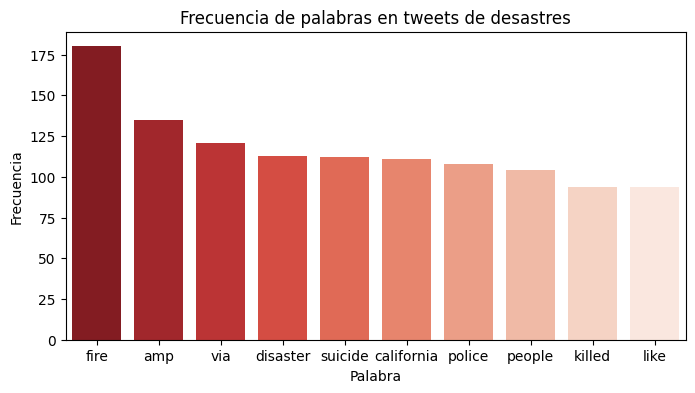

C:\Users\josue\AppData\Local\Temp\ipykernel_20008\589953566.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='word', y='count', data=df_non_disaster, palette='Blues_r')


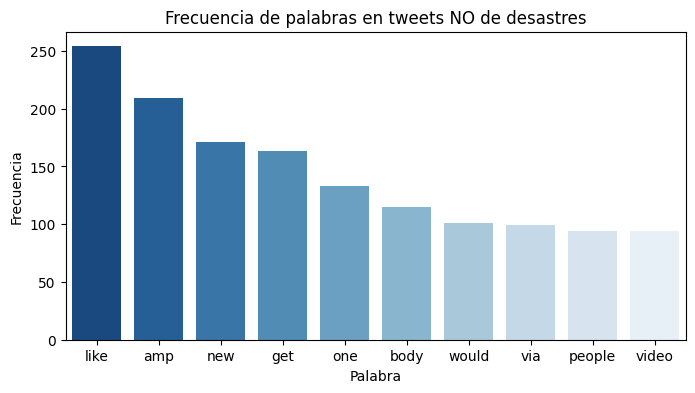

In [78]:
display(data[['text', 'clean_text', 'target']])
# Graficar las palabras más frecuentes en tweets de desastres
df_disaster = pd.DataFrame(most_common_disaster, columns=['word', 'count'])
plt.figure(figsize=(8,4))
sns.barplot(x='word', y='count', data=df_disaster, palette='Reds_r')
plt.title('Frecuencia de palabras en tweets de desastres')
plt.ylabel('Frecuencia')
plt.xlabel('Palabra')
plt.show()

# Graficar las palabras más frecuentes en tweets NO de desastres
df_non_disaster = pd.DataFrame(most_common_non_disaster, columns=['word', 'count'])
plt.figure(figsize=(8,4))
sns.barplot(x='word', y='count', data=df_non_disaster, palette='Blues_r')
plt.title('Frecuencia de palabras en tweets NO de desastres')
plt.ylabel('Frecuencia')
plt.xlabel('Palabra')
plt.show()

In [79]:
# Palabras compartidas y exclusivas entre desastres y no desastres
set_disaster = set(freq_disaster.keys())
set_non_disaster = set(freq_non_disaster.keys())

# Palabras presentes en ambas categorías
shared_words = set_disaster & set_non_disaster
print(f'Cantidad de palabras compartidas: {len(shared_words)}')
print('Ejemplo de palabras compartidas:')
print(list(shared_words)[:15])

# Palabras exclusivas de desastres
exclusive_disaster = set_disaster - set_non_disaster
print(f'\nCantidad de palabras exclusivas de desastres: {len(exclusive_disaster)}')
print('Ejemplo de palabras exclusivas de desastres:')
print(list(exclusive_disaster)[:15])

# Palabras exclusivas de no desastres
exclusive_non_disaster = set_non_disaster - set_disaster
print(f'\nCantidad de palabras exclusivas de NO desastres: {len(exclusive_non_disaster)}')
print('Ejemplo de palabras exclusivas de NO desastres:')
print(list(exclusive_non_disaster)[:15])

Cantidad de palabras compartidas: 3509
Ejemplo de palabras compartidas:
['shoulder', 'gps', 'rose', 'safely', 'cage', 'anniversary', 'unprecedented', 'yelling', 'calories', 'border', 'officials', 'beck', 'talkin', 'gov', 'remain']

Cantidad de palabras exclusivas de desastres: 3391
Ejemplo de palabras exclusivas de desastres:
['okanowa', 'exhibition', 'usama', 'crazier', 'exchanging', 'spike', 'reliefweb', 'looping', 'sfa', 'participating', 'easton', 'mold', 'mascara', 'errrr', 'trigger']

Cantidad de palabras exclusivas de NO desastres: 5542
Ejemplo de palabras exclusivas de NO desastres:
['attempted', 'decided', 'capitulation', 'terrific', 'optimization', 'sigmund', 'fpoj', 'bcs', 'shirley', 'spaniels', 'hibernating', 'anna', 'pitcher', 'sheeran', 'miscalculation']


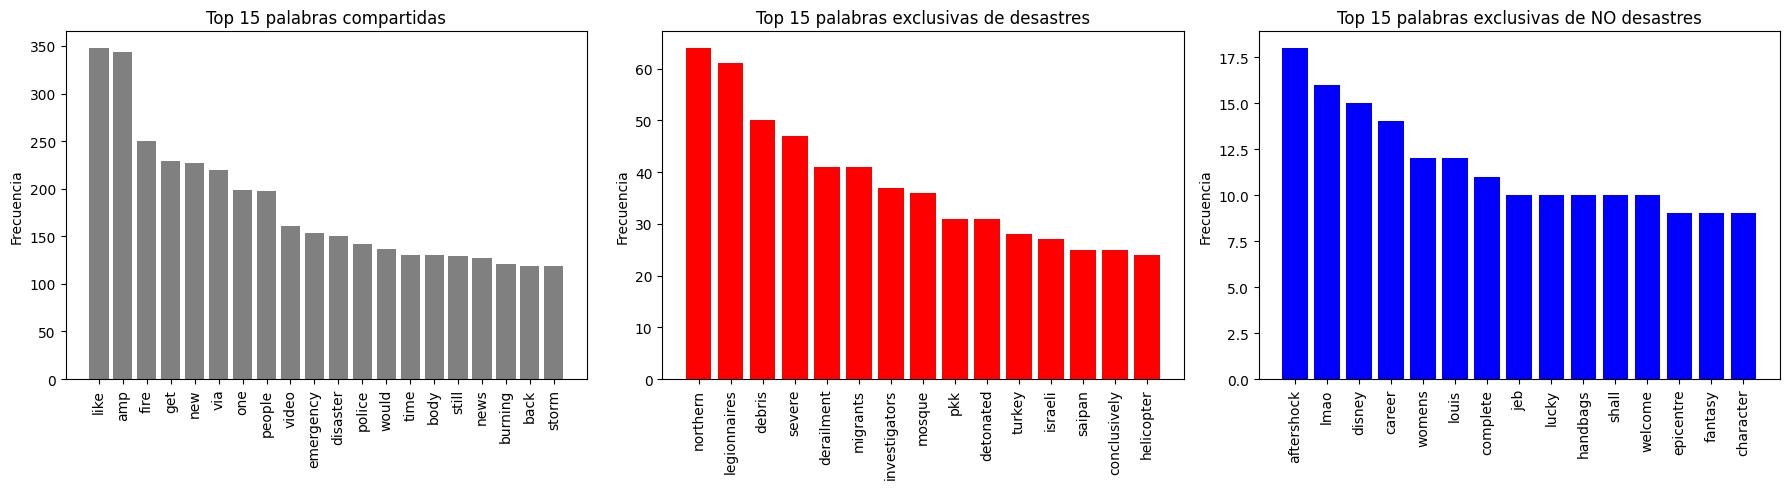

In [80]:
# Frecuencias de palabras compartidas
freq_shared = {w: freq_disaster[w] + freq_non_disaster[w] for w in shared_words}
df_shared = pd.DataFrame(sorted(freq_shared.items(), key=lambda x: x[1], reverse=True)[:20], columns=['Palabra', 'Frecuencia'])

# Frecuencias exclusivas de desastres
freq_exclusive_disaster = {w: freq_disaster[w] for w in exclusive_disaster}
df_exclusive_disaster = pd.DataFrame(sorted(freq_exclusive_disaster.items(), key=lambda x: x[1], reverse=True)[:15], columns=['Palabra', 'Frecuencia'])

# Frecuencias exclusivas de no desastres
freq_exclusive_non_disaster = {w: freq_non_disaster[w] for w in exclusive_non_disaster}
df_exclusive_non_disaster = pd.DataFrame(sorted(freq_exclusive_non_disaster.items(), key=lambda x: x[1], reverse=True)[:15], columns=['Palabra', 'Frecuencia'])

plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
plt.bar(df_shared['Palabra'], df_shared['Frecuencia'], color='gray')
plt.title('Top 15 palabras compartidas')
plt.xticks(rotation=90)
plt.ylabel('Frecuencia')

plt.subplot(1,3,2)
plt.bar(df_exclusive_disaster['Palabra'], df_exclusive_disaster['Frecuencia'], color='red')
plt.title('Top 15 palabras exclusivas de desastres')
plt.xticks(rotation=90)
plt.ylabel('Frecuencia')

plt.subplot(1,3,3)
plt.bar(df_exclusive_non_disaster['Palabra'], df_exclusive_non_disaster['Frecuencia'], color='blue')
plt.title('Top 15 palabras exclusivas de NO desastres')
plt.xticks(rotation=90)
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()